In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib as mpl

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e2/63/379617e3d982e8a66c9d66ebf4621d3357c7c18ad356473c335bffd5aba6/catboost-1.2.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.4/101.0 MB 11.6 MB/s eta 0:00:09
   ---------------------------------------- 1.0/101.0 MB 12.7 MB/s eta 0:00:08
    --------------------------------------- 1.7/101.0 MB 13.3 MB/s eta 0:00:08
    --------------------------------------- 2.2/101.0 MB 12.5 MB/s eta 0:00:08
   - -------------------------------------- 2.6/101.0 MB 11.9 MB/s eta 0:00:09
   - -------------------------------------- 3.1/101.0 MB 11.7 MB/s eta 0:00:09
   - -------------------------------------- 3.6/101.0 MB 11.4 MB/s eta 0:00:09
   - ---------

In [4]:
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go


from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler

from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder

from catboost import CatBoostRegressor

from scipy import stats

sns.set_style("whitegrid")


In [5]:
df = pd.read_csv(r"C:\Users\sanja\OneDrive\Desktop\UNCC\sem 2\ITCS 3162\clean_dataset.csv")

In [6]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))

There are 300153 observations for 12 predictors.


In [8]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

 no missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300153.0,150076.000000,86646.852011,0.00,75038.00,150076.00,225114.00,300152.00
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


In [12]:
df.describe(include='all')

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,NaN,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,NaN,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,NaN,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,86646.852011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,75038.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,150076.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,225114.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [13]:
df['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [14]:
df['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [15]:
df['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [16]:
df['flight'].value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

In [17]:
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'airline count based on class')]

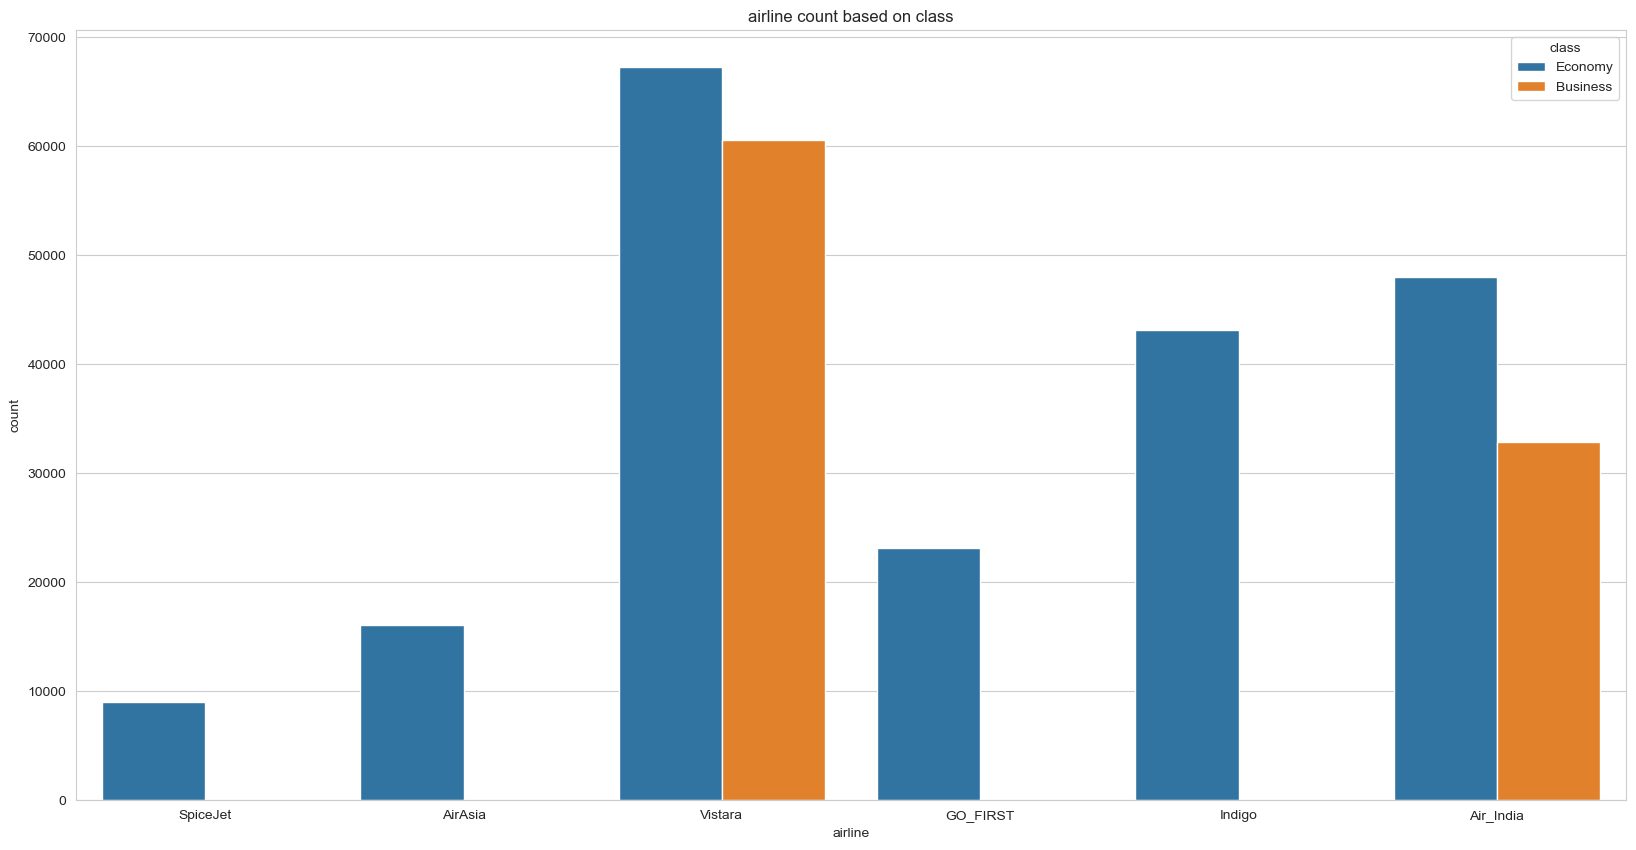

In [18]:
plt.figure(figsize=(20, 10))
sns.countplot(x='airline',hue='class' ,data= df ).set(title='airline count based on class')

[Text(0.5, 1.0, 'Source city count based on stops')]

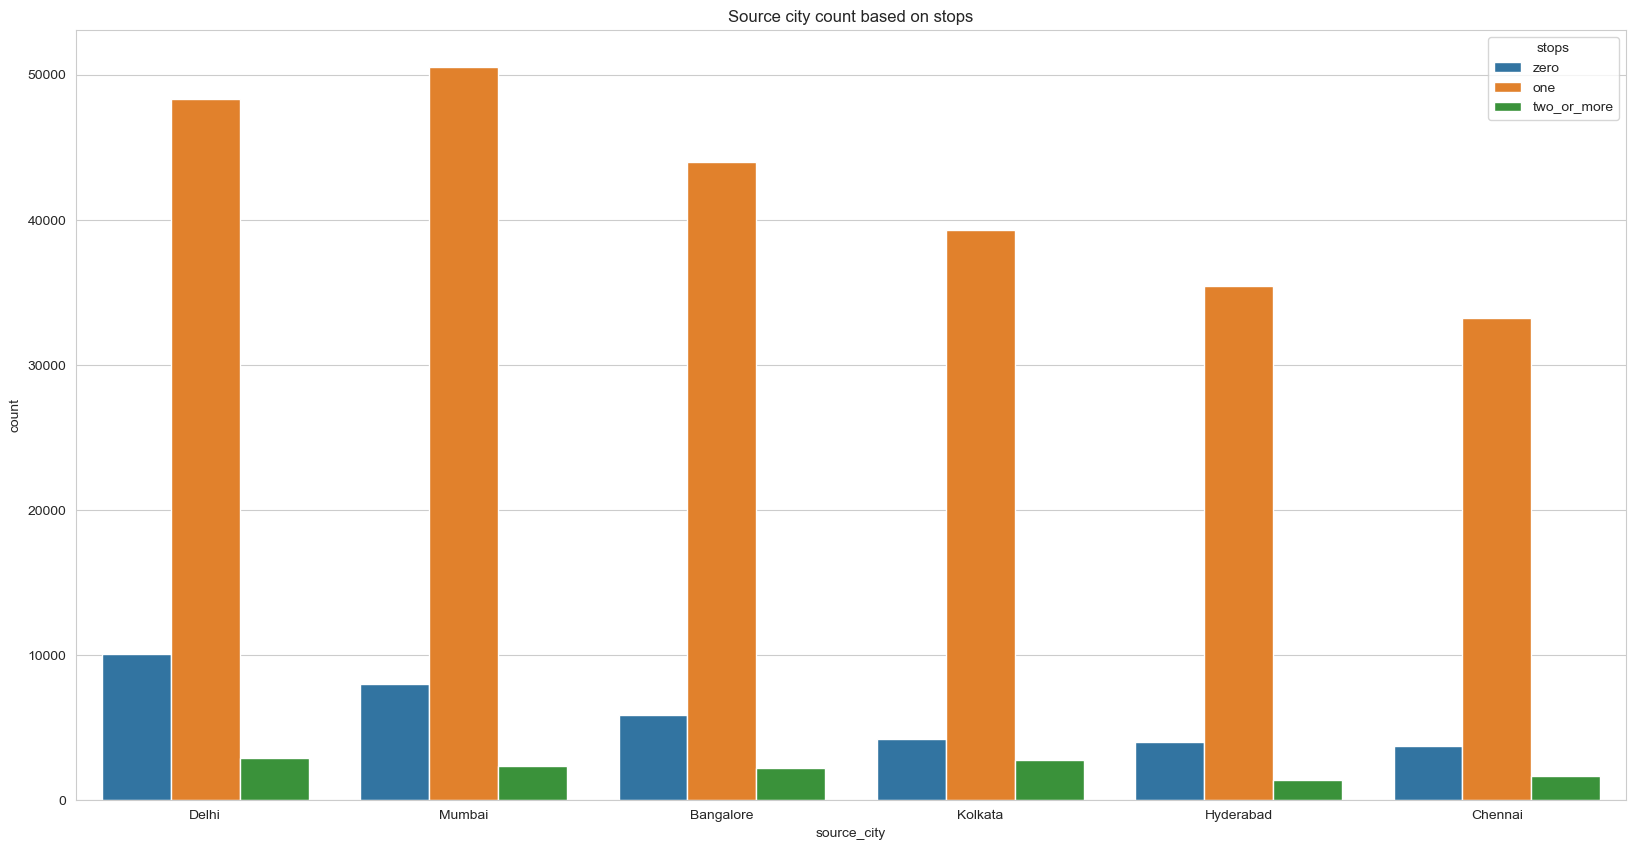

In [19]:
plt.figure(figsize=(20, 10))
sns.countplot(x='source_city',hue='stops',data=df).set(title='Source city count based on stops')

[Text(0.5, 1.0, 'Destination city count based on stops')]

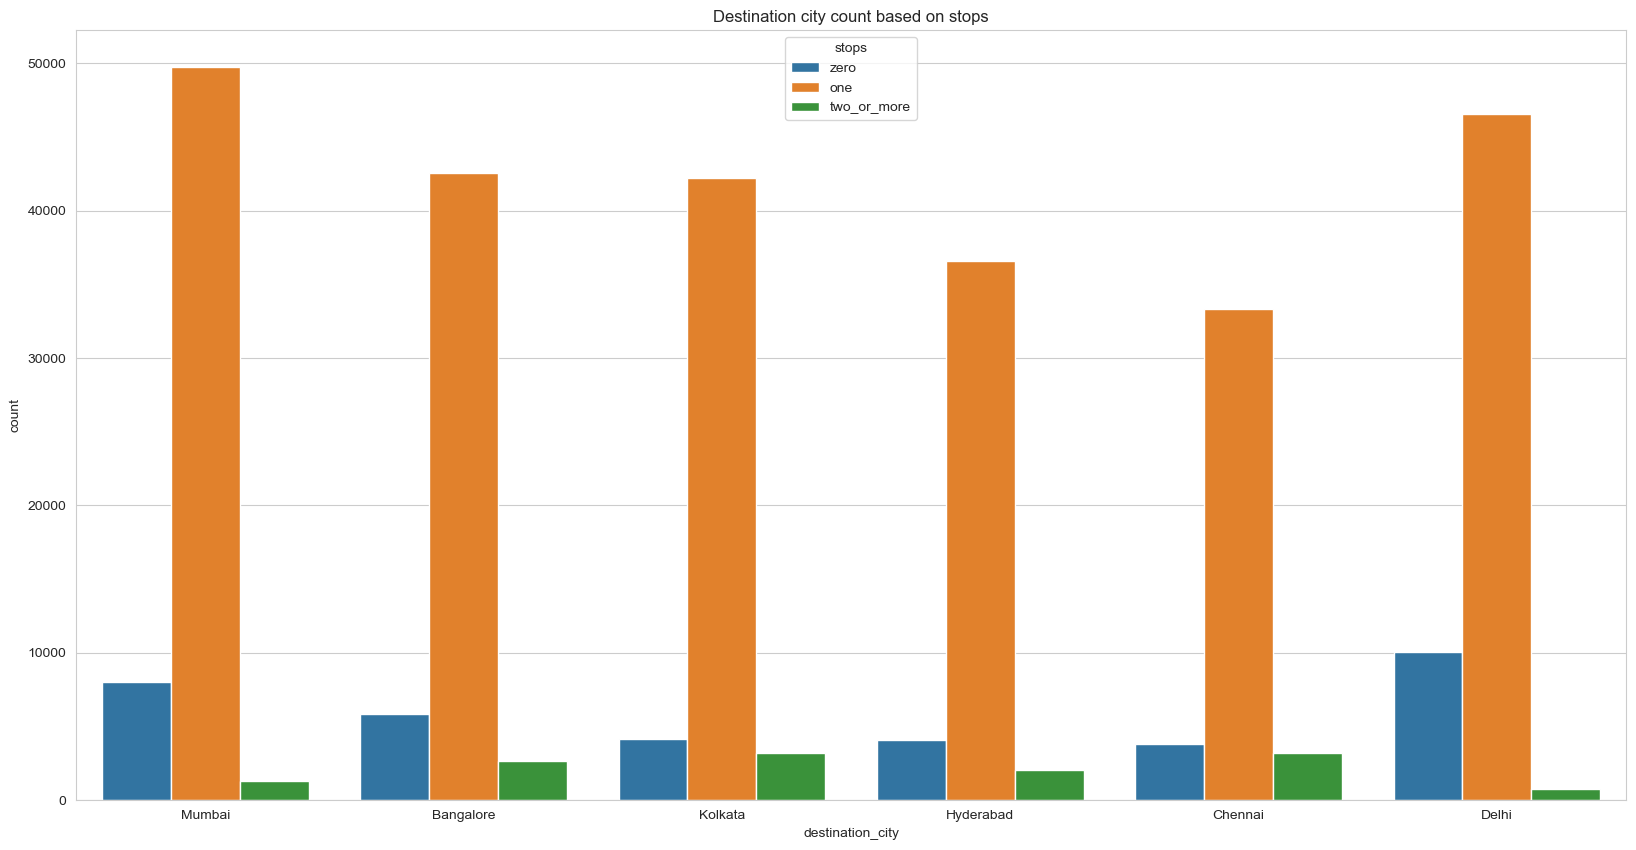

In [20]:
plt.figure(figsize=(20, 10))
sns.countplot(x='destination_city',hue='stops',data=df).set(title='Destination city count based on stops')

[Text(0.5, 1.0, 'Departure time count based on stops')]

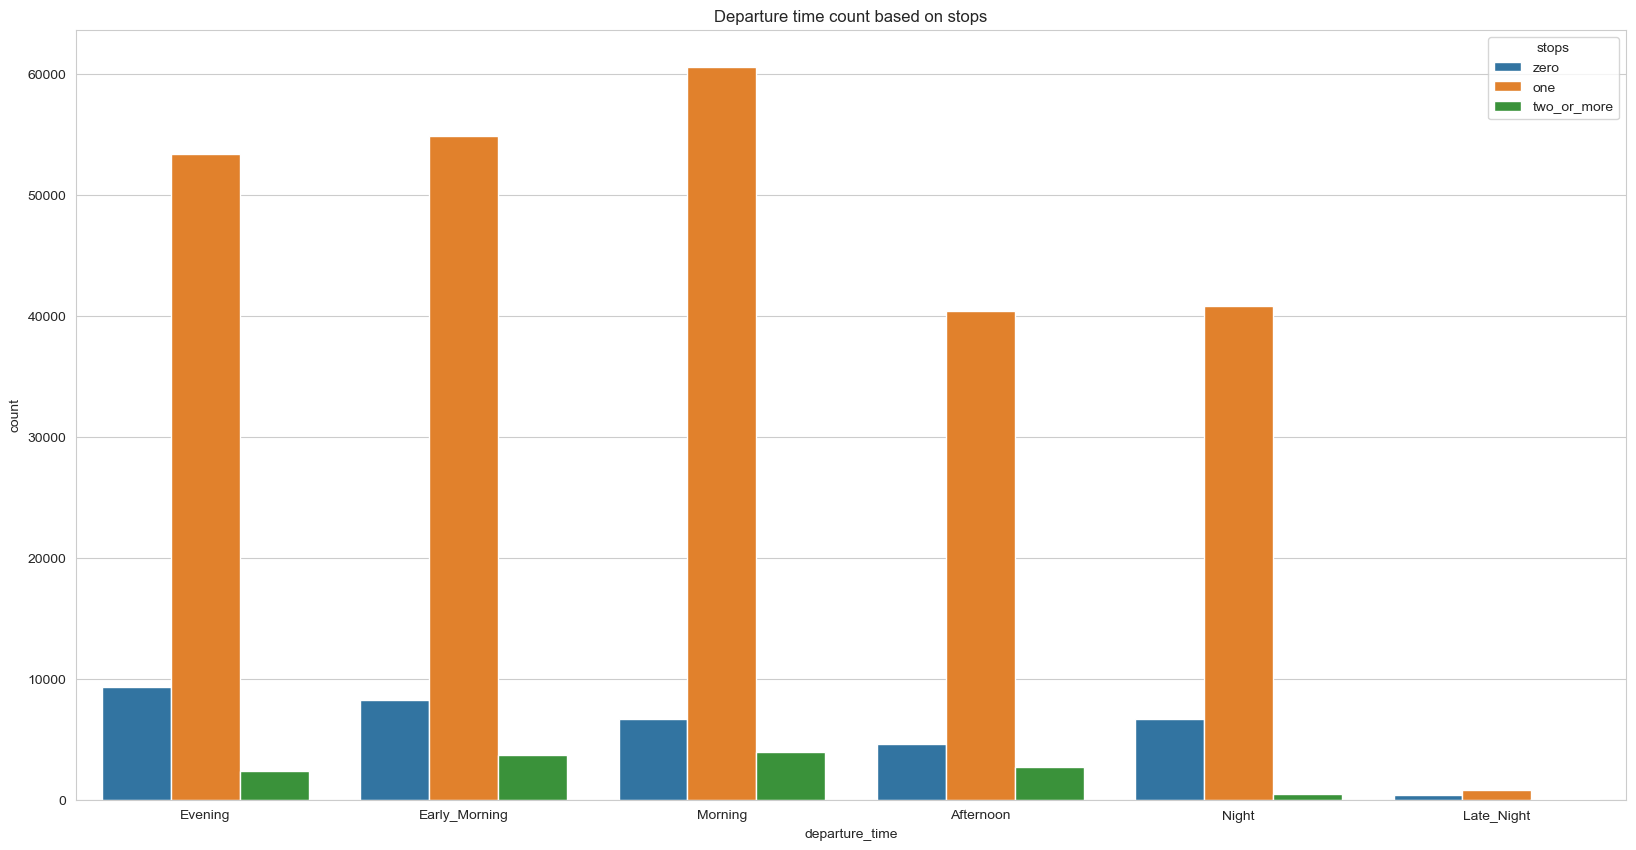

In [21]:
plt.figure(figsize=(20, 10))
sns.countplot(x='departure_time',hue='stops',data=df).set(title='Departure time count based on stops')

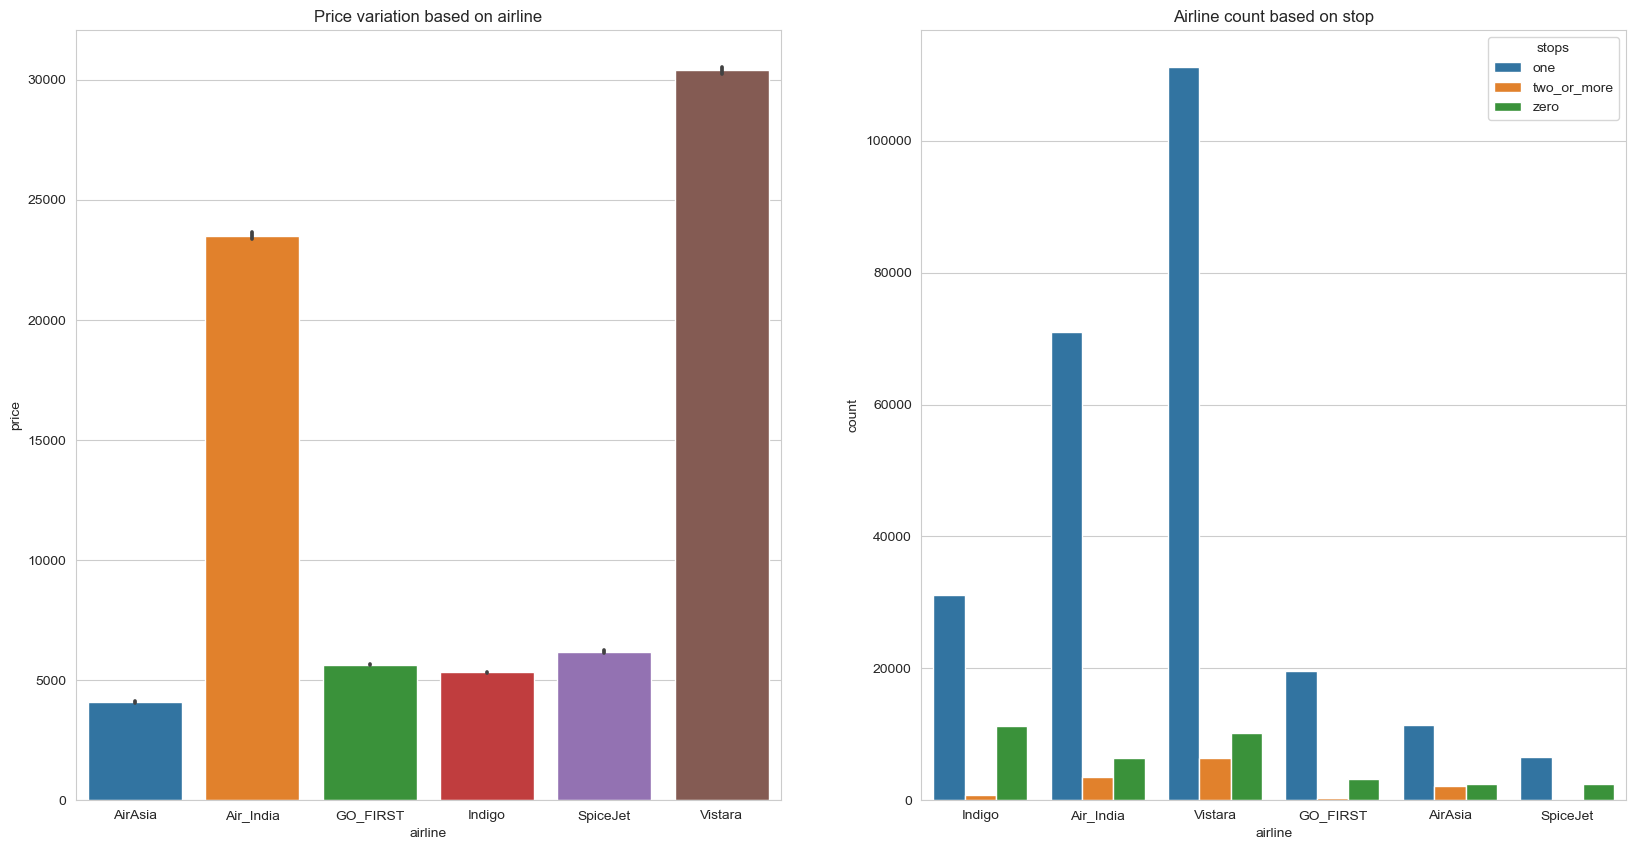

In [22]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
sns.barplot(x='airline', y='price', data=df.sort_values('airline', axis=0), ax=axes[0])
axes[0].set(title='Price variation based on airline')

sns.countplot(x='airline',hue='stops', data=df.sort_values('stops', axis=0), ax=axes[1])
axes[1].set(title='Airline count based on stop');

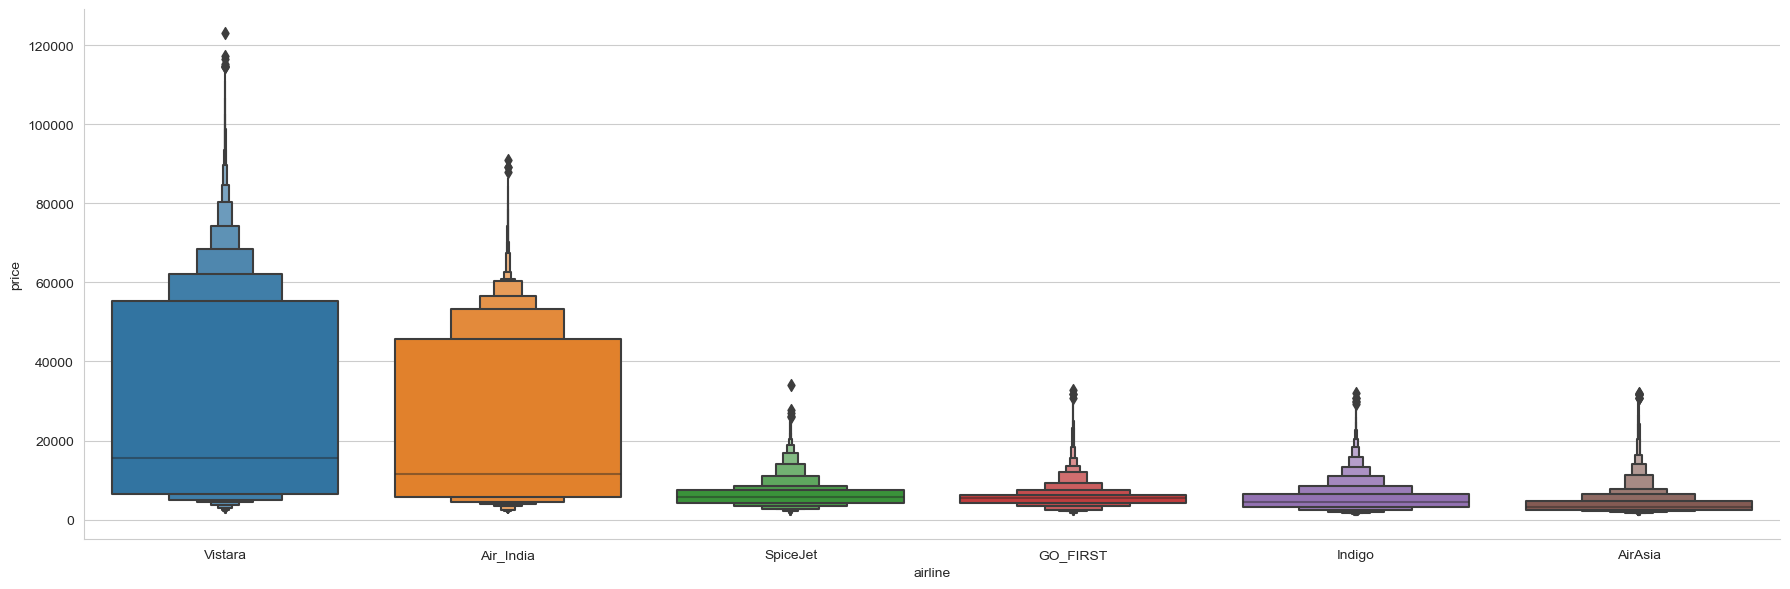

In [23]:
# Airline vs Price
sns.catplot(y = "price", x = "airline", data = df.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

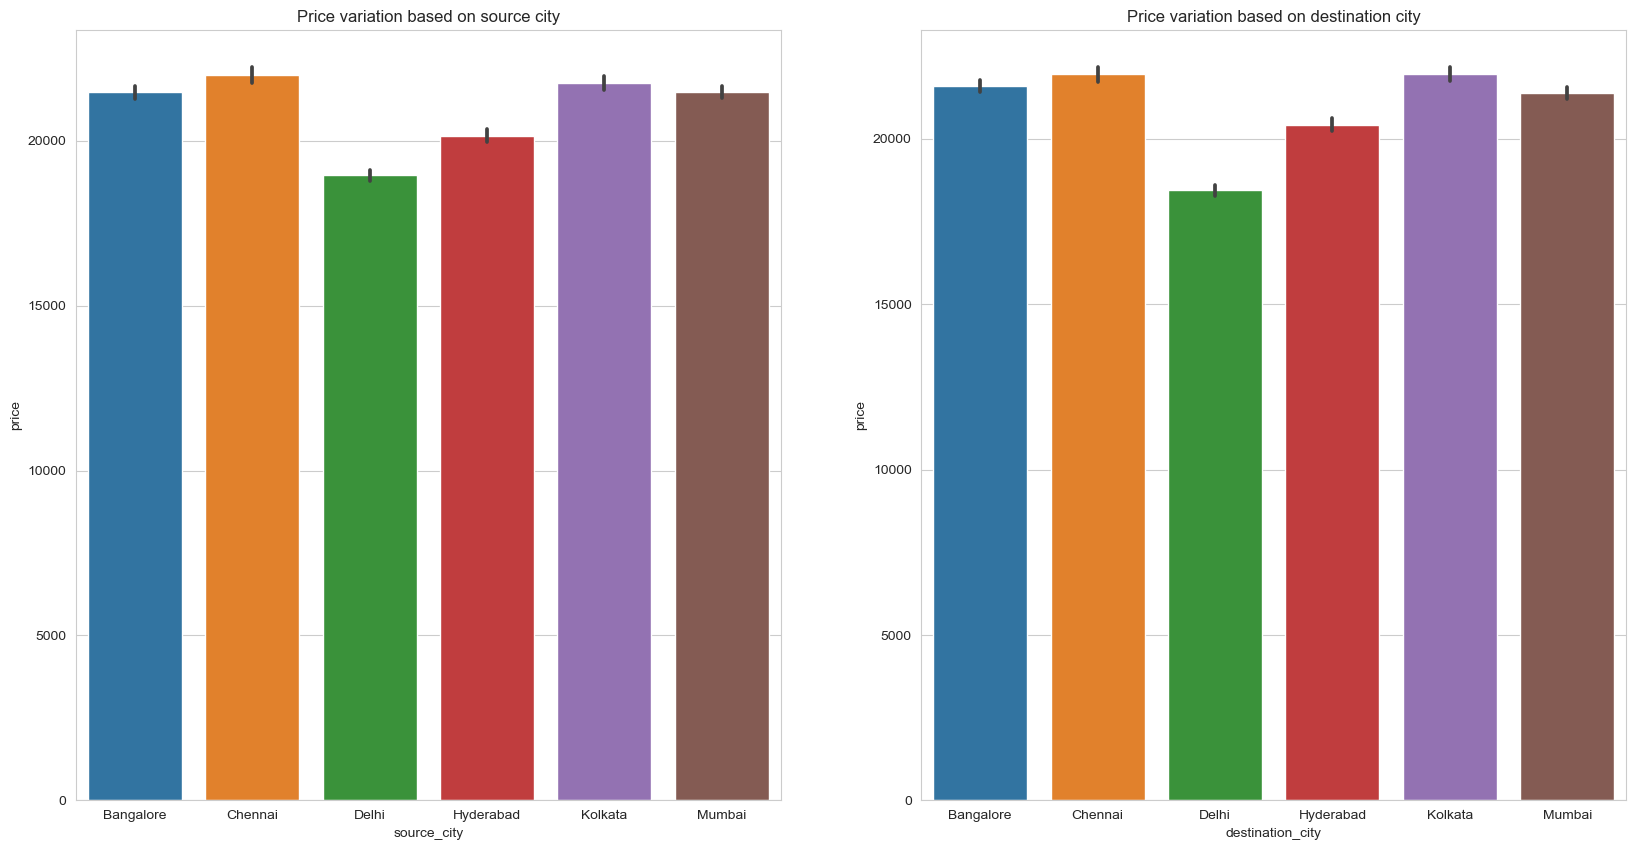

In [24]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
sns.barplot(x='source_city', y='price', data=df.sort_values('source_city', axis=0), ax=axes[0])
axes[0].set(title='Price variation based on source city')

sns.barplot(x='destination_city', y='price', data=df.sort_values('destination_city', axis=0), ax=axes[1])
axes[1].set(title='Price variation based on destination city');

Text(0.5, 1.0, 'Airline prices based on the class and company')

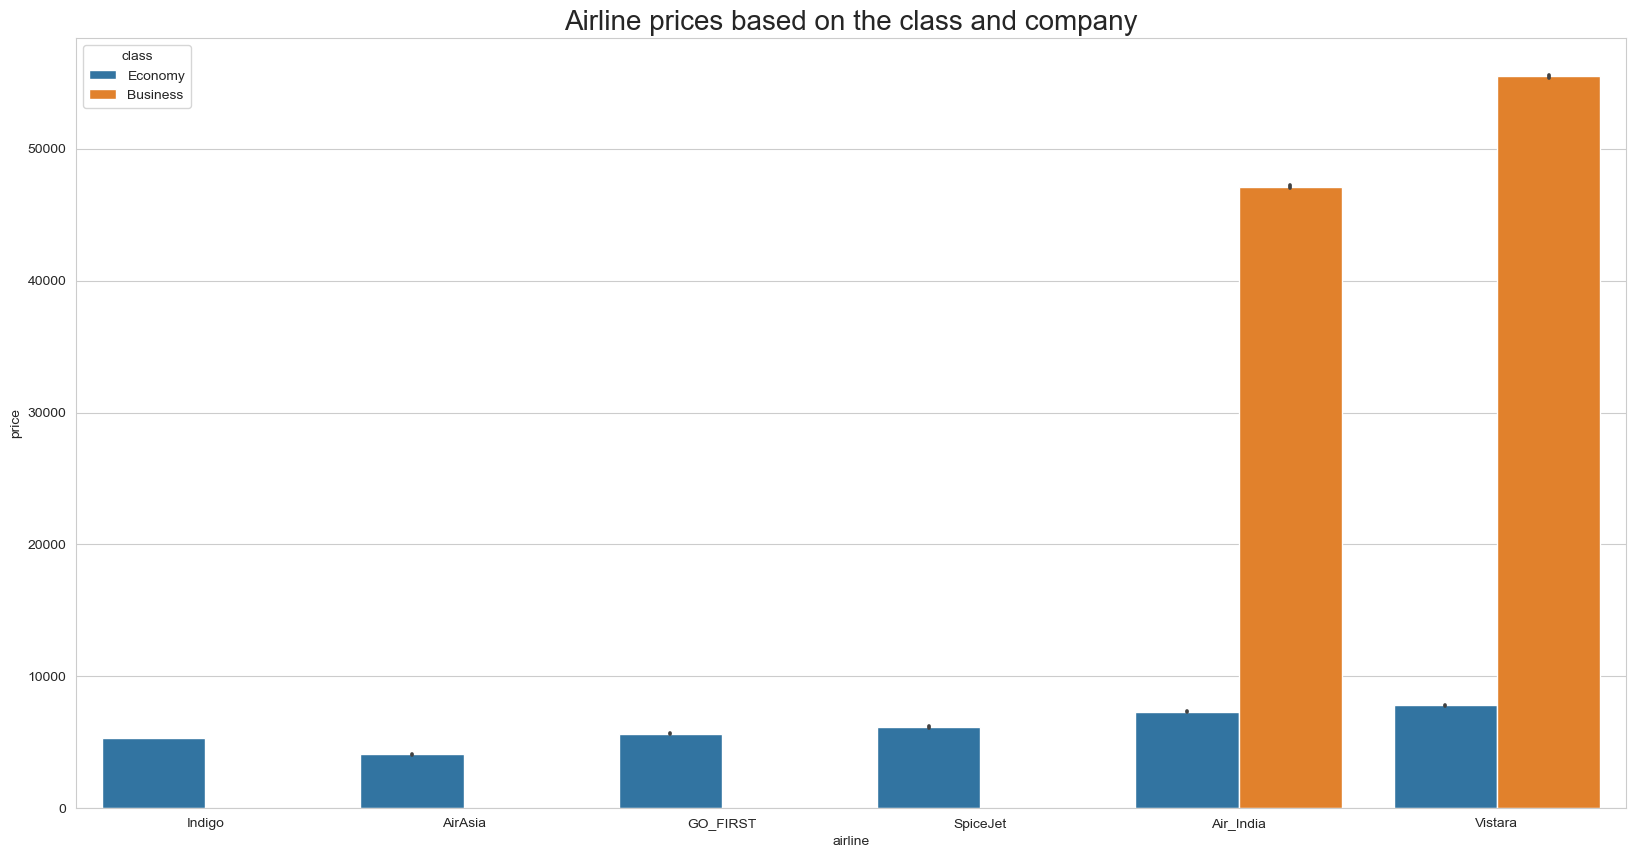

In [25]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

In [26]:
def preprocessing(df):
    #Encode the ordinal variables "stops" and "class".
    df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
    df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)
    
    #Create the dummy variables for the cities, the times and the airlines.
    dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
    dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
    df = pd.concat([df,dummies],axis=1)
    
    #Create the dummy variables for the cities, the times and the airlines.
    df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)
    
    return df

In [27]:
df_preprocessed = preprocessing(df)

In [29]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [31]:
# As airline is Nominal Categorical data we will perform OneHotEncoding

airline = df[["airline"]]

airline = pd.get_dummies(airline, drop_first= True)

airline.head()

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1


In [32]:
# As source city is Nominal Categorical data we will perform OneHotEncoding

source = df[["source_city"]]
source = pd.get_dummies(source, drop_first= True)
source.head()

,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [33]:
# As departure time is Nominal Categorical data we will perform OneHotEncoding

departure = df[["departure_time"]]
departure = pd.get_dummies(departure, drop_first= True)
departure.head()

,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [34]:
# As arrival time is Nominal Categorical data we will perform OneHotEncoding

arrival = df[["arrival_time"]]
arrival = pd.get_dummies(arrival, drop_first= True)
arrival.head()

,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,0,0,1
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,1,0


In [35]:
# As destination city is Nominal Categorical data we will perform OneHotEncoding

destination = df[["destination_city"]]
destination = pd.get_dummies(destination, drop_first= True)
destination.head()

,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [36]:
df.replace({"zero": 0, "one": 1, "two_or_more": 2}, inplace = True)
df.replace({"Economy": 0, "Business": 1}, inplace = True)
df2 = pd.concat([df, airline, source, departure, arrival, destination], axis = 1)
df2.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,...,0,0,0,0,1,0,0,0,0,1
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,...,0,0,0,1,0,0,0,0,0,1
2,2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,...,1,0,0,0,0,0,0,0,0,1
3,3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,...,0,0,0,0,0,0,0,0,0,1
4,4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,0,2.33,...,0,0,0,1,0,0,0,0,0,1


In [37]:
df2.drop(["airline", "flight", 'source_city', "departure_time", 'arrival_time', 'destination_city'], axis = 1, inplace = True)
scaler = MinMaxScaler()
num_vars = ['duration', 'days_left']
df2[num_vars] = scaler.fit_transform(df2[num_vars])
df2.head()

,Unnamed: 0,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,0.027347,0.0,5953,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0.030612,0.0,5953,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,2,0,0,0.027347,0.0,5956,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3,0,0,0.028980,0.0,5955,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0.030612,0.0,5955,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [38]:
X = df2.drop(['price'], axis=1)
y = df2['price']

In [39]:
X

,Unnamed: 0,stops,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,0.027347,0.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,1,0,0,0.030612,0.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,2,0,0,0.027347,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,3,0,0,0.028980,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0.030612,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,1,1,0.188776,1.0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
300149,300149,1,1,0.195714,1.0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
300150,300150,1,1,0.265306,1.0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
300151,300151,1,1,0.187143,1.0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [40]:
df2.describe()

,Unnamed: 0,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,...,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,0.924312,0.311464,0.232470,0.520932,20889.660523,0.269503,0.077204,0.143660,0.030021,...,0.051364,0.260944,0.046646,0.209010,0.304971,0.134491,0.191103,0.142347,0.165029,0.196890
std,86646.852011,0.398106,0.463093,0.146775,0.282521,22697.767366,0.443702,0.266915,0.350745,0.170646,...,0.220739,0.439150,0.210880,0.406602,0.460396,0.341180,0.393170,0.349407,0.371207,0.397649
min,0.000000,0.000000,0.000000,0.000000,0.000000,1105.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75038.000000,1.000000,0.000000,0.122449,0.291667,4783.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150076.000000,1.000000,0.000000,0.212653,0.520833,7425.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,225114.000000,1.000000,1.000000,0.313061,0.770833,42521.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,300152.000000,2.000000,1.000000,1.000000,1.000000,123071.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


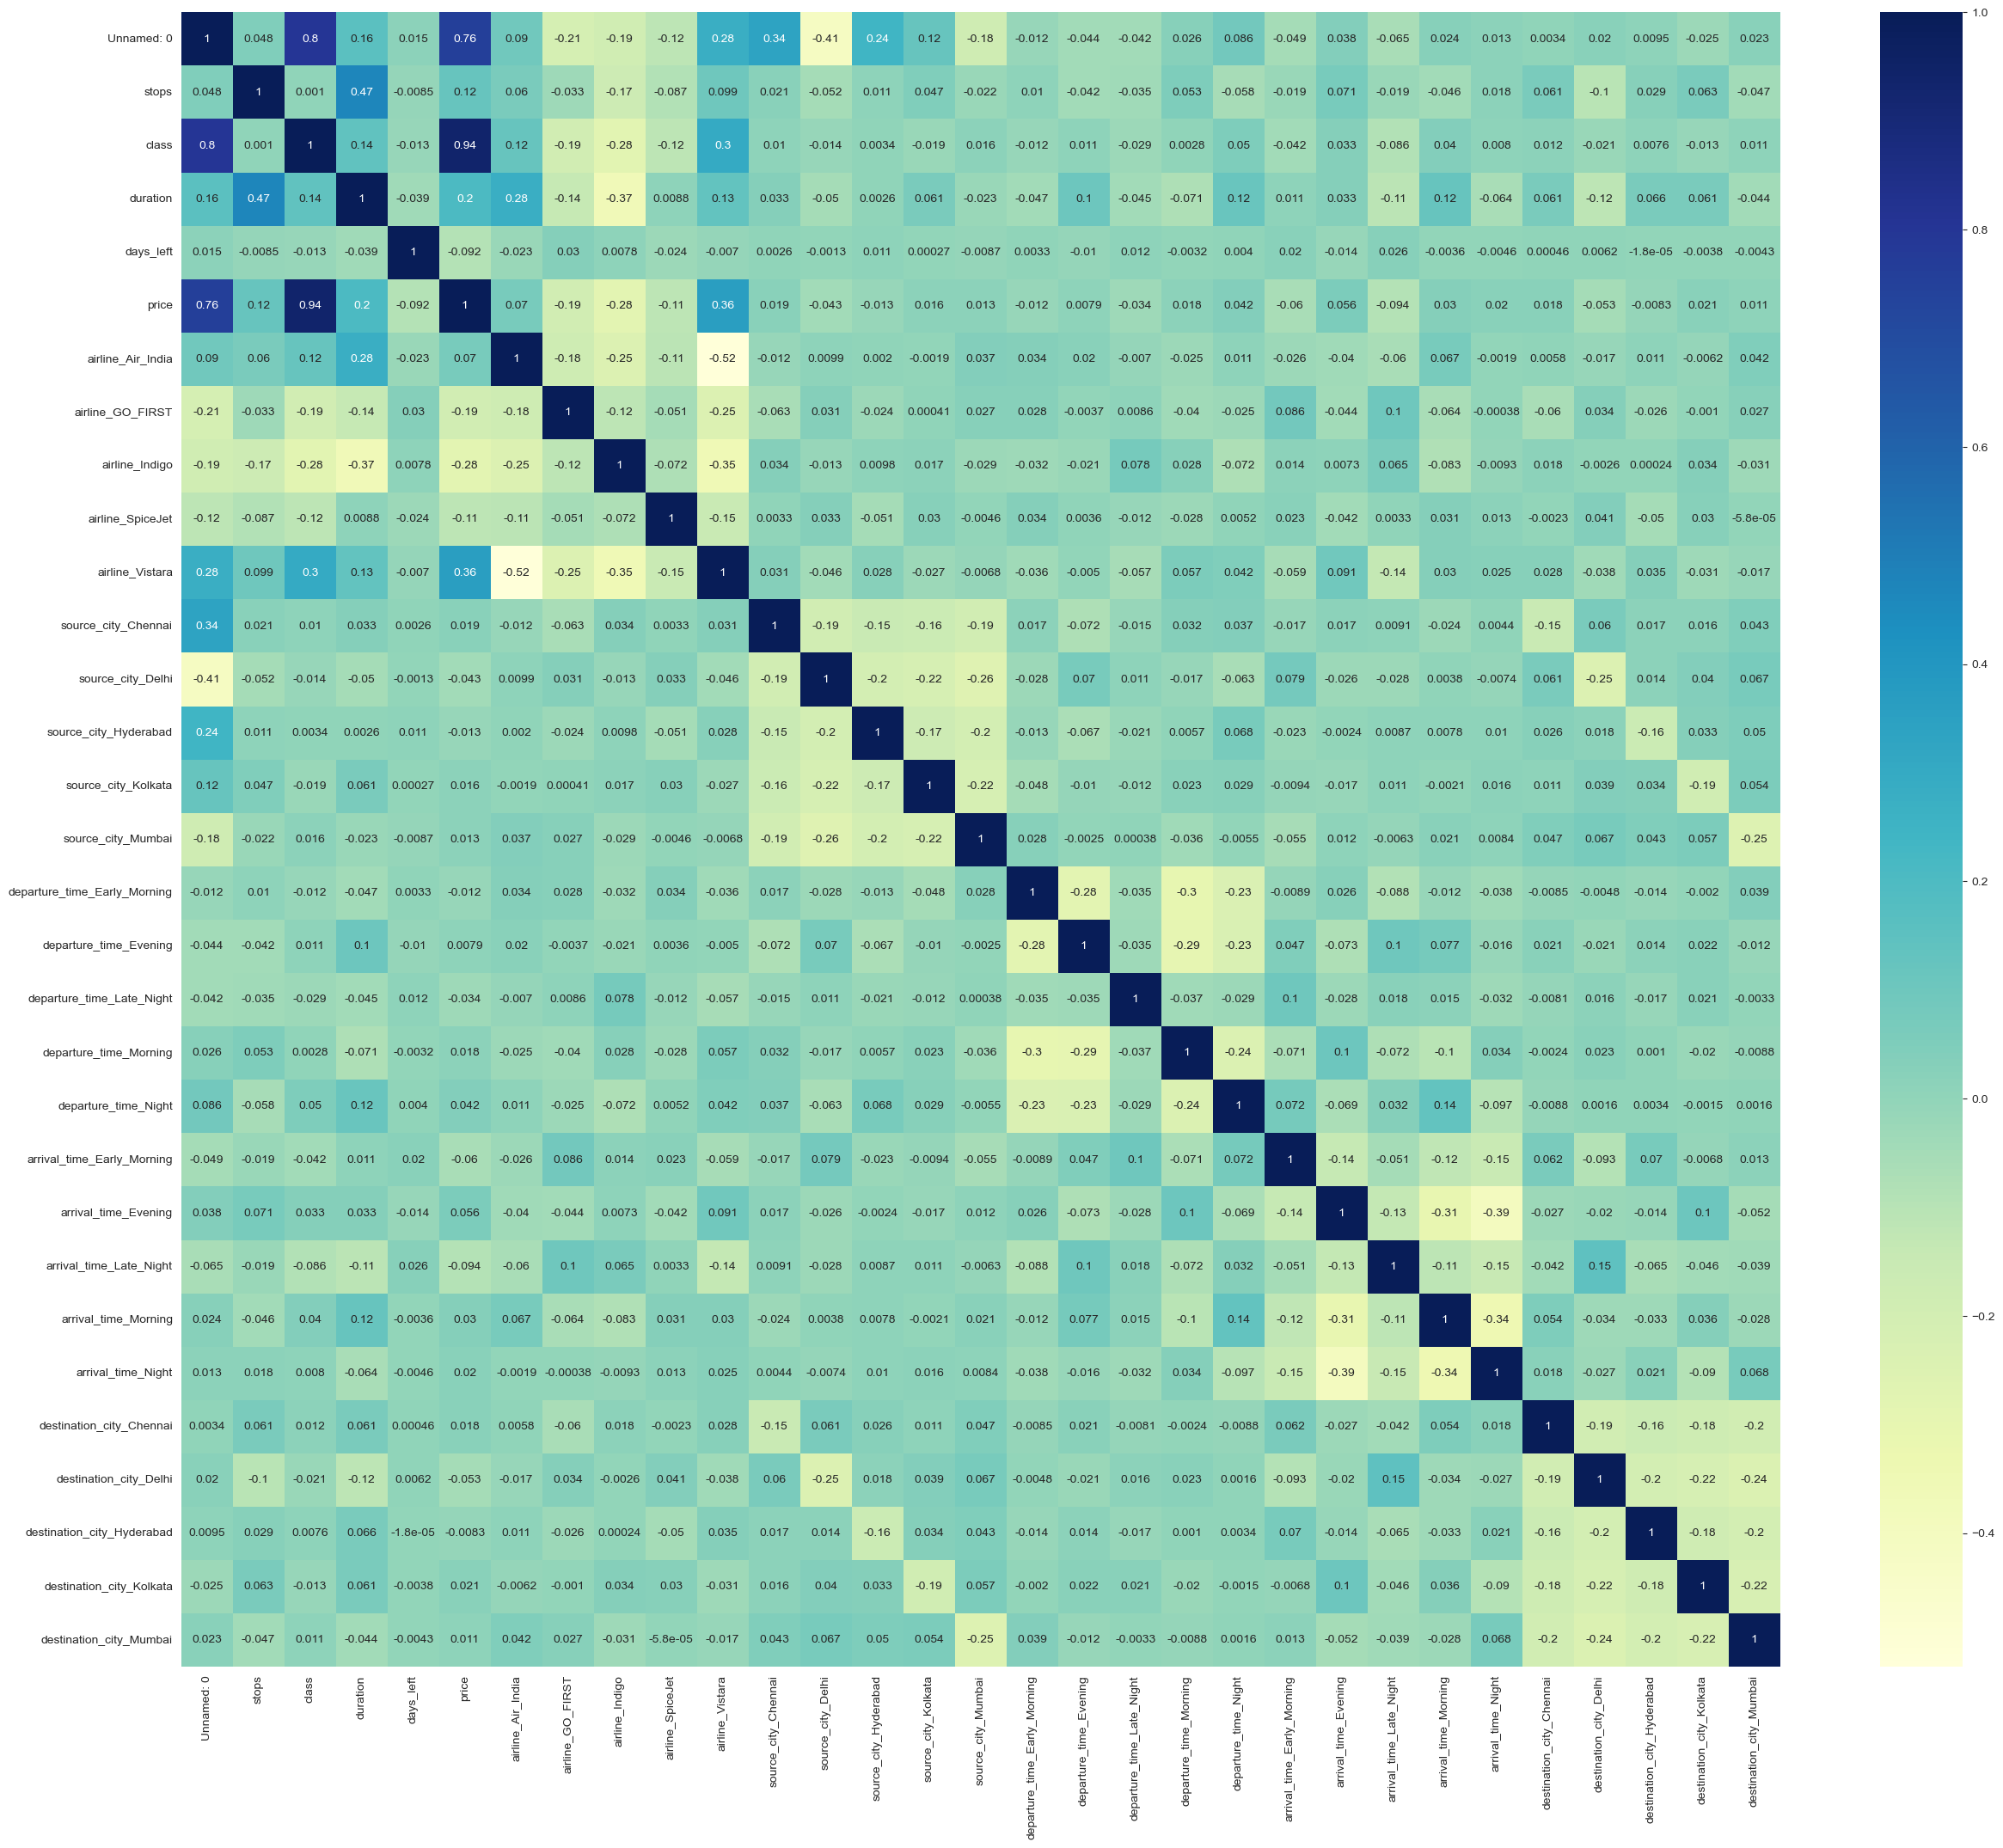

In [41]:
plt.figure(figsize = (30, 25))
sns.heatmap(df2.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [42]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [43]:
print(selection.feature_importances_)

[9.95798486e-03 3.11972338e-02 8.79600249e-01 2.32061905e-02
 1.51463789e-02 5.14175655e-03 1.83805325e-04 1.66014662e-04
 1.43736090e-04 5.78860797e-03 6.36452006e-04 3.16595886e-03
 1.30261893e-03 1.84535258e-03 2.15632308e-03 1.05493550e-03
 1.44945080e-03 5.42393934e-05 1.29041745e-03 9.38093595e-04
 9.35507326e-04 1.48544641e-03 2.08490737e-04 1.02562923e-03
 1.67285547e-03 7.89648151e-04 3.77761305e-03 1.77040457e-03
 1.92903042e-03 1.97957473e-03]


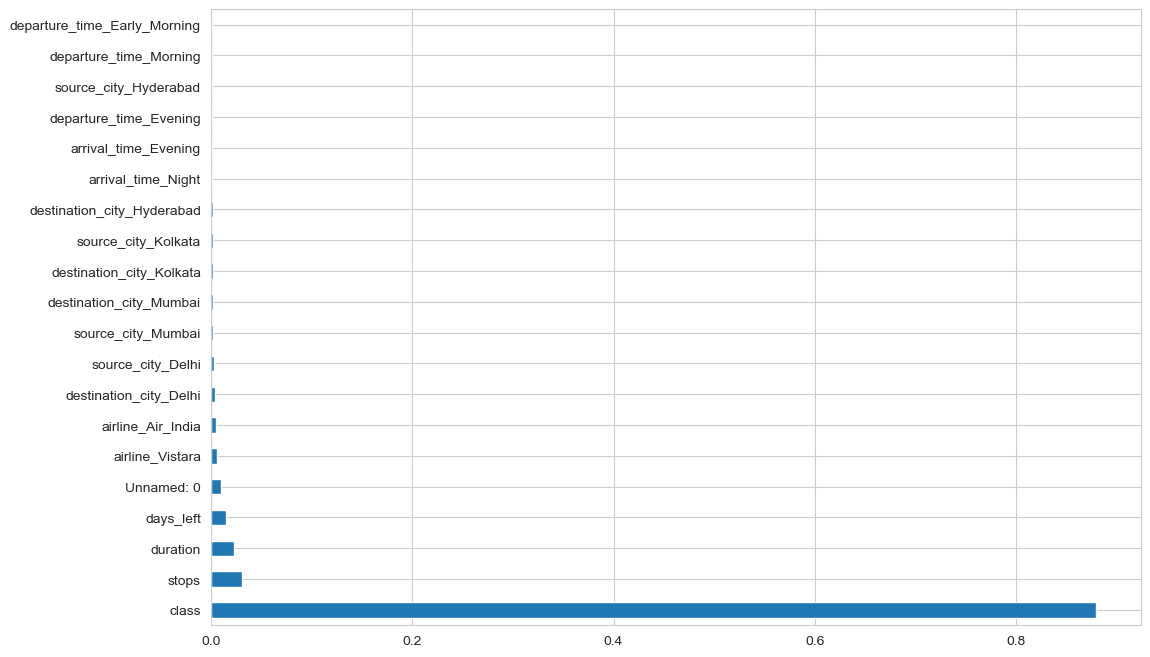

In [44]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [45]:
X = df2[['class', 'stops', 'duration', 'days_left']]
y = df2['price']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

In [47]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 5788.13701482 50637.56023358  5041.43241229 ...  6937.69883365
 -1579.62770683 56749.66898953]


In [48]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.9001487797463544
Mean Squared Error:  51471534.03497547
Mean Absolute Error: 4595.674349880667
Root Mean Squared Error: 7174.3664553028975


gradient booster regressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gbre = GradientBoostingRegressor()
gbre.fit(X_train, y_train)
y_pred = gbre.predict(X_test)
print(y_pred)

[ 5568.0216066  56278.18372987  5151.52723864 ...  5504.15158835
  2606.86657897 59598.82972206]


In [50]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.9346405250938503
Mean Squared Error:  33691650.7238897
Mean Absolute Error: 3407.8807315685403
Root Mean Squared Error: 5804.450940777233


random forest regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(y_pred)

[ 5081.11569841 63218.87419229  5008.82464895 ...  5933.53807757
  2767.75954973 79529.68582143]


In [52]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.9234596819101836
Mean Squared Error:  39455177.18862329
Mean Absolute Error: 3673.0011551732687
Root Mean Squared Error: 6281.335621396399


In [53]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(regr, file)

# model=open('flight_rf.pkl', 'rb')
# flight_price = pickle.load(model)